# Set Up

In [ ]:
%%capture
!wget https://www.dropbox.com/scl/fi/6u1yfcnnf4jqmhedx519u/Reviews.csv?rlkey=xqmvvohkq0i0k7hho79fs43b6&st=mexudbu2&dl=0
!mv Reviews.csv?rlkey=xqmvvohkq0i0k7hho79fs43b6 reviews.csv

In [ ]:

# Metadata for each restaurant
!wget https://www.dropbox.com/scl/fi/cxckzuj81gsnlsvclqnza/metadata.json.gz?rlkey=d4xerrcwbeyt09oi01f9f4wru&st=sv6cnpzh&dl=0
!mv metadata.json.gz?rlkey=d4xerrcwbeyt09oi01f9f4wru metadata.json.gz


--2024-11-21 00:27:24--  https://www.dropbox.com/scl/fi/cxckzuj81gsnlsvclqnza/metadata.json.gz?rlkey=d4xerrcwbeyt09oi01f9f4wru
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfc73bfbcc3370eac271bee5322.dl.dropboxusercontent.com/cd/0/inline/CewoWG_2LJD5A3nYZ7s97M16rcLXEwpQL8_psAQ3gkEAvsZXSO-5vgImbuXHEalIMNgT-BFk-Uas8pHX6RVMe2iQZp0x7kGtn5-tHpMFEWuDWAUR_FJUfNQ6y7zl2leZbQmbEwTfus_RLxG76BQswDGO/file# [following]
--2024-11-21 00:27:25--  https://ucfc73bfbcc3370eac271bee5322.dl.dropboxusercontent.com/cd/0/inline/CewoWG_2LJD5A3nYZ7s97M16rcLXEwpQL8_psAQ3gkEAvsZXSO-5vgImbuXHEalIMNgT-BFk-Uas8pHX6RVMe2iQZp0x7kGtn5-tHpMFEWuDWAUR_FJUfNQ6y7zl2leZbQmbEwTfus_RLxG76BQswDGO/file
Resolving ucfc73bfbcc3370eac271bee5322.dl.dropboxusercontent.com (ucfc73bfbcc3370eac271bee5322.dl.dropboxusercontent.com)... 162.125.3.15, 26

# Libraries

In [7]:
import json
import gzip
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Data Download

In [8]:
# Obtenemos el json de la metadata
def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield json.loads(l)

metadata = list(parse('metadata.json.gz'))
metadata = metadata[0]

In [9]:
new_metadata = []
for value in metadata.values():
    new_metadata.extend(value)

In [10]:
new_metadata[0]

{'name': 'Vons Chicken',
 'address': 'Vons Chicken, 12740 La Mirada Blvd, La Mirada, CA 90638',
 'gmap_id': '0x80dd2b4c8555edb7:0xfc33d65c4bdbef42',
 'description': None,
 'latitude': 33.9164023,
 'longitude': -118.01085499999999,
 'category': ['Restaurant'],
 'avg_rating': 4.5,
 'num_of_reviews': 18,
 'price': None,
 'hours': [['Thursday', '11AM–9:30PM'],
  ['Friday', '11AM–9:30PM'],
  ['Saturday', '11AM–9:30PM'],
  ['Sunday', '11AM–9:30PM'],
  ['Monday', 'Closed'],
  ['Tuesday', '11AM–9:30PM'],
  ['Wednesday', '11AM–9:30PM']],
 'MISC': {'Service options': ['Outdoor seating',
   'Curbside pickup',
   'No-contact delivery',
   'Delivery',
   'Takeout',
   'Dine-in'],
  'Health & safety': ['Mask required',
   'Staff wear masks',
   'Staff required to disinfect surfaces between visits'],
  'Popular for': ['Lunch', 'Dinner', 'Solo dining'],
  'Accessibility': ['Wheelchair accessible entrance'],
  'Offerings': ['Comfort food', 'Quick bite', 'Small plates'],
  'Dining options': ['Lunch', 'D

In [53]:
restaurants = {}
# Creamos el diccionario de restaurantes.

for data in new_metadata:
    name = data['name']


    if not restaurants.get(name):
        restaurants[name] = {
            'avg_rating_lst': [],
            'num_of_reviews_lst' : [],
            'categories' : [],
            'descriptions' : [],
            'MISC' : {
                'popular_for_lst' : [],
                'offerings_lst' : [],
                'atmosphere_lst' : [],
            },
        }


    restaurants[name]['avg_rating_lst'].append(data['avg_rating'])
    restaurants[name]['num_of_reviews_lst'].append(data['num_of_reviews'])
    restaurants[name]['categories'].extend(data['category'])
    if data['description']:
        restaurants[name]['descriptions'].append(data['description'])

    if data['MISC'] is None: continue

    if data['MISC'].get('Popular for') and data.get('MISC'):
        restaurants[name]['MISC']['popular_for_lst'].extend(data['MISC']['Popular for'])


    if data['MISC'].get('Atmosphere') and data.get('MISC'):
        restaurants[name]['MISC']['atmosphere_lst'].extend(data['MISC']['Atmosphere'])

    if data['MISC'].get('Offerings') and data.get('MISC'):
        restaurants[name]['MISC']['offerings_lst'].extend(data['MISC']['Offerings'])



In [54]:
# Mapeamos cada restaurante para limpiar datos.
def avg(lst):
    if len(lst) == 1:
        return lst[0]
    else:
        return np.mean(lst)

for name, data in restaurants.items():
    restaurants[name]['avg_rating_lst'] = avg(restaurants[name]['avg_rating_lst'])
    restaurants[name]['num_of_reviews_lst'] = avg(restaurants[name]['num_of_reviews_lst'])
    restaurants[name]['categories'] = set(restaurants[name]['categories'])
    restaurants[name]['MISC']['popular_for_lst'] = set(restaurants[name]['MISC']['popular_for_lst'])
    restaurants[name]['MISC']['offerings_lst'] = set(restaurants[name]['MISC']['offerings_lst'])
    restaurants[name]['MISC']['atmosphere_lst'] = set(restaurants[name]['MISC']['atmosphere_lst'])

In [56]:
restaurants_cols = {
    'name': [],
    'categories': [],
    'offerings' : [],
    'avgRating' : [],
    'avgNumReviews' : [],
    'popularFor' : [],
    'atmosphere' : [],
    'descriptions': [],
}
for name, data in restaurants.items():
    restaurants_cols['name'].append(name)
    restaurants_cols['avgRating'].append(data['avg_rating_lst'])
    restaurants_cols['avgNumReviews'].append(data['num_of_reviews_lst'])

    restaurants_cols['categories'].append(";".join(list(data['categories'])))

    restaurants_cols['offerings'].append(";".join(list(data['MISC']['offerings_lst'])))

    if data['MISC']['popular_for_lst']:
        restaurants_cols['popularFor'].append(";".join(list(data['MISC']['popular_for_lst'])))
    else:
        restaurants_cols['popularFor'].append(np.nan)

    if data['MISC']['atmosphere_lst']:
        restaurants_cols['atmosphere'].append(";".join(list(data['MISC']['atmosphere_lst'])))
    else:
        restaurants_cols['atmosphere'].append(np.nan)

    if data['descriptions']:
        restaurants_cols['descriptions'].append(";".join(list(data['descriptions'])))
    else:
        restaurants_cols['descriptions'].append(np.nan)


In [57]:
df_restaurants = pd.DataFrame(data=restaurants_cols)

In [58]:
df_restaurants

,name,categories,offerings,avgRating,avgNumReviews,popularFor,atmosphere,descriptions
0,Vons Chicken,Restaurant,Comfort food;Small plates;Quick bite,4.5,18.0,Solo dining;Lunch;Dinner,Casual,NaN
1,Beau Pre Cafe,Cafe;Breakfast restaurant;Hamburger restaurant...,Beer;Vegetarian options;Happy hour food;Coffee...,4.6,18.0,Solo dining;Lunch;Dinner,Cozy;Casual,NaN
2,Chin's Szechwan - Carlsbad,Chinese noodle restaurant;Soup restaurant;Dump...,Beer;Vegetarian options;Wine;Alcohol;Comfort f...,4.8,48.0,Solo dining;Lunch;Dinner,Casual,NaN
3,The Plant Power Truck,Restaurant,Vegetarian options;Comfort food;Healthy option...,4.9,8.0,Lunch;Solo dining,Casual,NaN
4,Tacos El Comelon (Food Truck),Restaurant,Comfort food;Small plates;Quick bite,5.0,18.0,Solo dining;Dinner,Casual,NaN
...,...,...,...,...,...,...,...,...
7039,China Cafe,Chinese restaurant,Vegetarian options;Comfort food;Healthy option...,4.1,138.0,Solo dining;Lunch;Dinner,Casual,This unassuming counter-serve offers typical C...
7040,Touchdown Deli,Deli;Takeout Restaurant;Fast food restaurant;R...,,4.4,95.0,NaN,NaN,NaN
7041,Supreme Thai Bistro,Thai restaurant,Beer;Vegetarian options;Small plates;Happy hou...,4.4,98.0,Solo dining;Lunch;Dinner,Cozy;Casual,NaN
7042,La China Poblana Taqueria,Mexican restaurant,Vegetarian options;Coffee;Kids' menu;Quick bit...,4.5,333.0,Solo dining;Lunch;Breakfast;Dinner,Cozy;Casual,NaN


# Data & Statistics

In [59]:
df_restaurants.to_csv('restaurants.csv', index=True)

In [60]:
rest_idxs = list(range(df_restaurants.shape[0]))

In [61]:
K = 100

In [62]:
max_avg_rating = df_restaurants['avgNumReviews'].max()

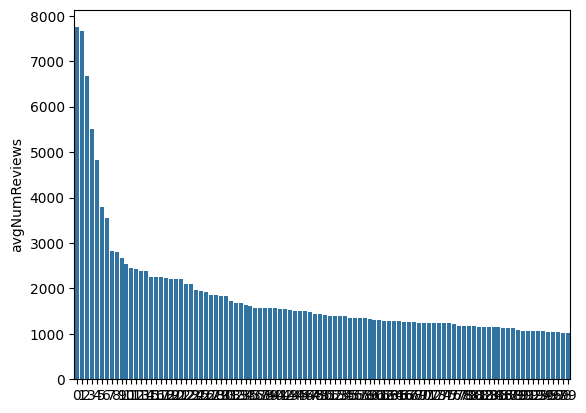

In [63]:
# Most K popular restaurants

mp_values = df_restaurants.sort_values(by="avgNumReviews", ascending=False).iloc[0:K]
plot = sns.barplot(x=rest_idxs[0:K], y=mp_values['avgNumReviews'])

In [64]:
df_restaurants.sort_values(by="avgNumReviews", ascending=False).iloc[0:K]

,name,categories,offerings,avgRating,avgNumReviews,popularFor,atmosphere,descriptions
2734,Royal Hawaiian Center,Food court;Shopping mall;Restaurant,,4.300000,7747.000000,NaN,NaN,Upmarket retailer specializing in fine jewelry...
5447,Captain George's Seafood Restaurant,Fine dining restaurant;Seafood restaurant;Buff...,Coffee;Kids' menu;Alcohol;All you can eat;Comf...,4.500000,7671.000000,Solo dining;Lunch;Dinner,Cosy;Casual,"Family-friendly seafood spot, one of a nautica..."
3347,Marukame Udon Waikiki,Udon noodle restaurant;Restaurant,Vegetarian options;Quick bite;Late-night food;...,4.500000,6669.000000,Solo dining;Lunch;Breakfast;Dinner,Casual,Guests order at the counter at this casual Jap...
3348,Giovanni's Shrimp Truck,Seafood restaurant,Comfort food;Small plates;Quick bite,4.100000,5502.000000,Lunch;Solo dining,Casual,"Established, graffiti-decorated pit stop for a..."
2704,The Cheesecake Factory,Dessert restaurant;Restaurant;American restaurant,Beer;Vegetarian options;Small plates;Coffee;Ha...,4.300000,4821.000000,Solo dining;Lunch;Breakfast;Dinner,Cosy;Casual,American chain restaurant offering sizable por...
...,...,...,...,...,...,...,...,...
3653,Don Pedro's Family Mexican,Family restaurant;Mexican restaurant,Small plates;Happy hour food;Coffee;Kids' menu...,4.100000,1038.000000,Solo dining;Lunch;Dinner,Cozy;Casual,NaN
5493,Freddy's Frozen Custard & Steakburgers,Fast food restaurant;Hamburger restaurant,Comfort food;Kids' menu;Quick bite;Late-night ...,4.300000,1034.000000,Solo dining;Lunch;Dinner,Casual,"Retro-style chain for steakburgers, hot dogs &..."
5579,Bonnie Blue Southern Market & Bakery,Barbecue restaurant;Bakery;Southern restaurant...,,4.500000,1033.000000,NaN,NaN,"Southern joint offering BBQ, fried oysters, ba..."
3704,Luckys 13 Pub,Bar;American restaurant,Small plates;Happy hour food;Coffee;Kids' menu...,4.100000,1028.000000,Solo dining;Lunch;Breakfast;Dinner,Cozy;Casual,NaN
